# Multiple Linear Regression Model 
# For The Prediction Of Demand For Shared Bikes

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.

#### Business Goal:
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1:  Reading and Understanding the Data

In [188]:
#Import required packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [189]:
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [190]:
#importing data
bike=pd.read_csv("day.csv")

In [191]:
#Inspecting the data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [192]:
#dataset shape

bike.shape

(730, 16)

In [193]:
#checking features in the dataset
bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [194]:
#checking if null values and datatypes of the features
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [195]:
#Generating descriptive statistics of the features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [196]:
#checking for duplicate rows
bike.duplicated().sum()

0

#### Observation so far :

* Dataset has 730 rows and 16 columns and there are no null values present
* Dataset has no Duplicates
* All features are either float or integer type , except  dteday column with date type,
* Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
* We shall analyse and finalize whether to convert them to categorical or treat as integer.

##  2: Data Preparation and Visualising (EDA)



In [197]:
#setting whitegrid style for seaborn plots
sns.set(style="whitegrid")

### Dropping irrelevant columns

* instant - index variable, so it doest make any siginficance for model, so we will consider to drop
* dteday - we have year ,month and weekday as separate columns, we can consider to drop
* casual,registered = Both these columns contains the count of bike booked by different categories of customers. 
  Since our objective is to find the total count of bikes and not by specific category, we shall drop these two columns. 
  

In [198]:
bike.drop(['instant', 'dteday','casual', 'registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [199]:
#sanity check
bike.shape

(730, 12)

### Converting datatypes of 4 categorical features 'mnth', 'weekday', 'season' & 'weathersit'  into 'category' data types

In [200]:
bike["mnth"]=bike["mnth"].astype("category")
bike["weekday"]=bike["weekday"].astype("category")
bike["season"]=bike["season"].astype("category")
bike["weathersit"]=bike["weathersit"].astype("category")

In [201]:
#sanity check
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Converting categorical features

In [202]:
import calendar
bike.mnth = bike.mnth.apply(lambda x: calendar.month_abbr[x])

In [203]:
#mapping weather situation
bike.weathersit=bike.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [204]:
# mapping seasons
bike.season = bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [205]:
# mapping weekdays
bike.weekday = bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [206]:
#sanity check
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing Numerical Features using pairplots

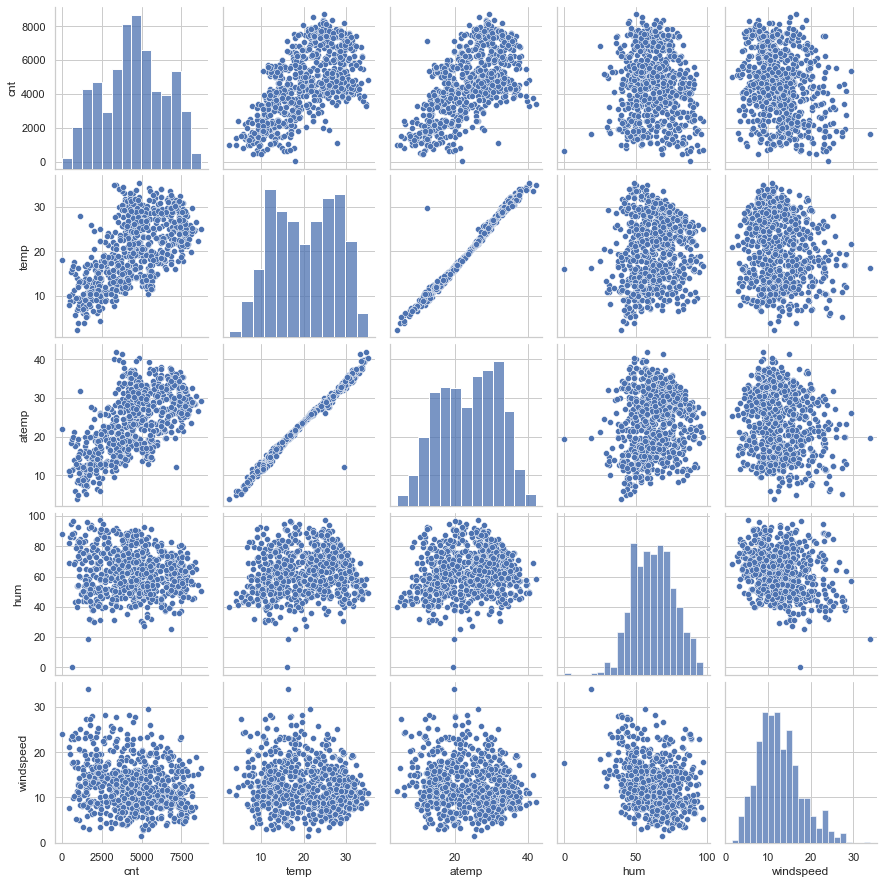

In [207]:
sns.pairplot(bike[['cnt', 'temp', 'atemp', 'hum','windspeed']])

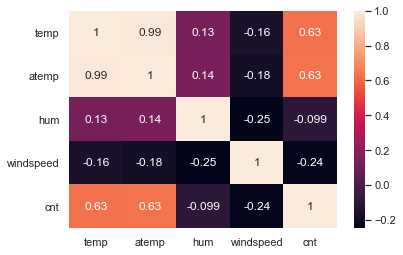

In [208]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.show()

### Observations
* we can infer from Pair-Plot that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'
* There is multicollinearity between temp and atemp.  We will decide which parameters to keep based on VIF and p-value    w.r.t other variables

### Plotting Distribution of Target Feature cnt 

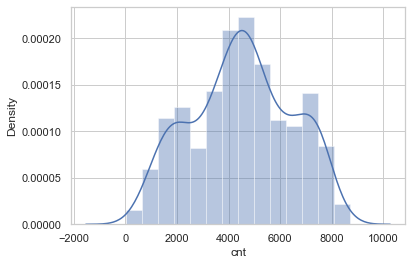

In [209]:
sns.distplot(bike.cnt)
plt.show()

### Visualizing categorical features

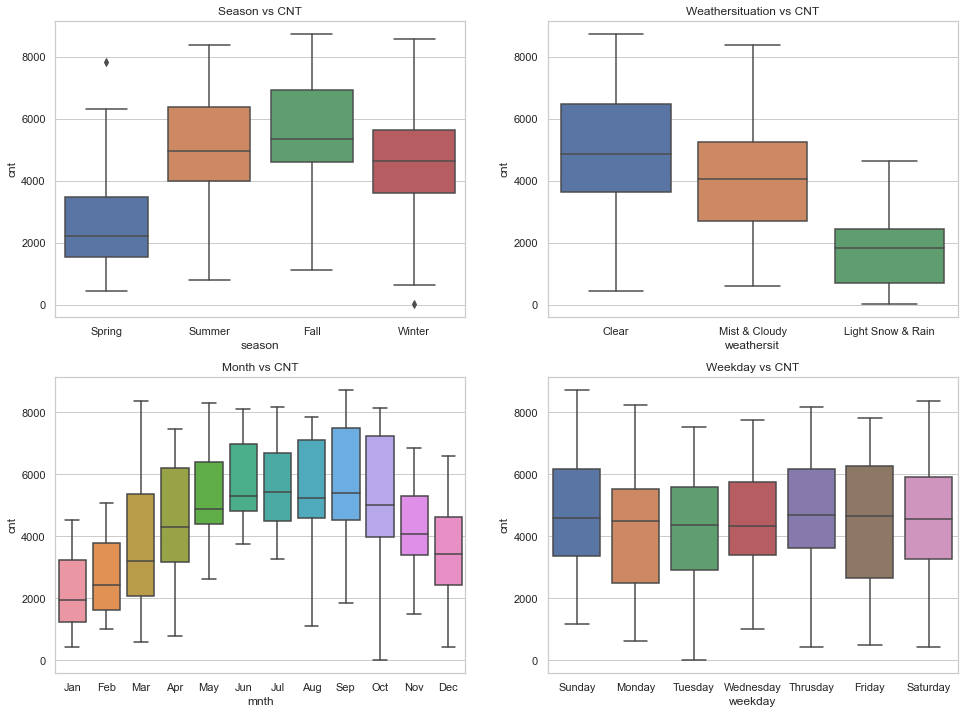

In [210]:
# Plotting boxplots to ascertain  the distribution/outliers

plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
plt.title("Season vs CNT")
sns.boxplot(x=bike['season'],y=bike['cnt'])
plt.subplot(2,3,2)
plt.title("Weathersituation vs CNT")
sns.boxplot(x=bike['weathersit'],y=bike['cnt'])
plt.subplot(2,3,4)
plt.title("Month vs CNT")
sns.boxplot(x=bike['mnth'],y=bike['cnt'])
plt.subplot(2,3,5)
plt.title("Weekday vs CNT")
sns.boxplot(x=bike['weekday'],y=bike['cnt'])
plt.show()

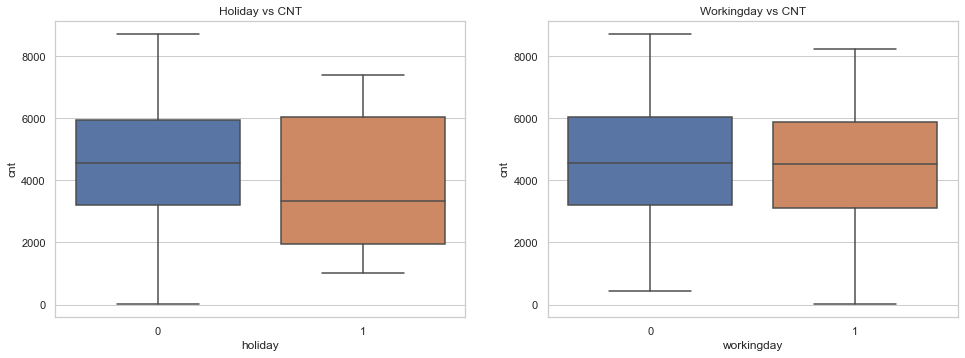

In [211]:
#checking other categorical variables
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
plt.title("Holiday vs CNT")
sns.boxplot(x=bike['holiday'],y=bike['cnt'])
plt.subplot(2,3,2)
plt.title("Workingday vs CNT")
sns.boxplot(x=bike['workingday'],y=bike['cnt'])
plt.show()

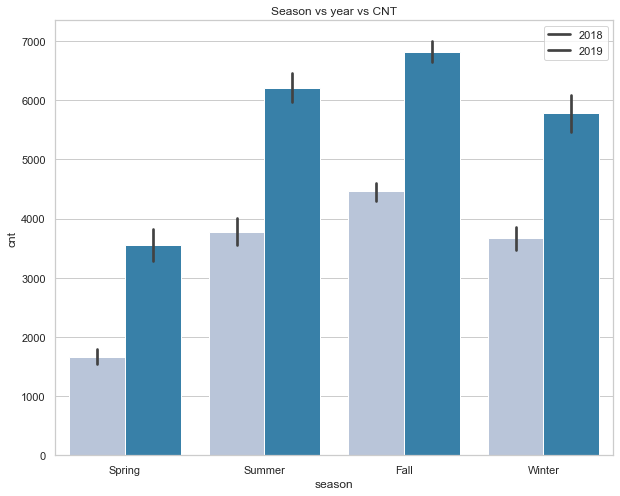

In [212]:
plt.figure(figsize=[10,8])
plt.title("Season vs year vs CNT")
sns.barplot(x=bike['season'], y=bike['cnt'], hue=bike['yr'],palette='PuBu')
plt.legend(labels=['2018', '2019'])
plt.show()

### Observations
###### Total 6 categorical features in dataset
* Weather: When the weather is more clear we can observe there are higher biker rentals 
* Months:  Maximum number of bike bookings were happening in the months june, july, aug, sept., oct with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
* Season: Bike reservations are lesser in Spring season compared to Summer and Fall
* weekday: weekday variable shows very close trend of total booking on all days of the week having   their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. We shall check when we build model whether if this needs to be added or not.
* workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Dummy variables

In [213]:
#Creating dummy variables for season , mnth ,weathersit ,weekday
dummies=pd.get_dummies(bike[['season','mnth','weekday','weathersit']],drop_first=True)

In [214]:
# updating dummy variables to original dataset
bike=pd.concat([dummies,bike],axis = 1)

In [215]:
#sanity check
bike.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### There are 34 variables in the updated dataset, Dropping 'season','mnth','weekday','weathersit' features which are not required

In [216]:
bike.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [217]:
#Sanity Check
bike.shape

(730, 30)

In [218]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Summer                 730 non-null    uint8  
 1   season_Fall                   730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Feb                      730 non-null    uint8  
 4   mnth_Mar                      730 non-null    uint8  
 5   mnth_Apr                      730 non-null    uint8  
 6   mnth_May                      730 non-null    uint8  
 7   mnth_Jun                      730 non-null    uint8  
 8   mnth_Jul                      730 non-null    uint8  
 9   mnth_Aug                      730 non-null    uint8  
 10  mnth_Sep                      730 non-null    uint8  
 11  mnth_Oct                      730 non-null    uint8  
 12  mnth_Nov                      730 non-null    uint8  
 13  mnth_

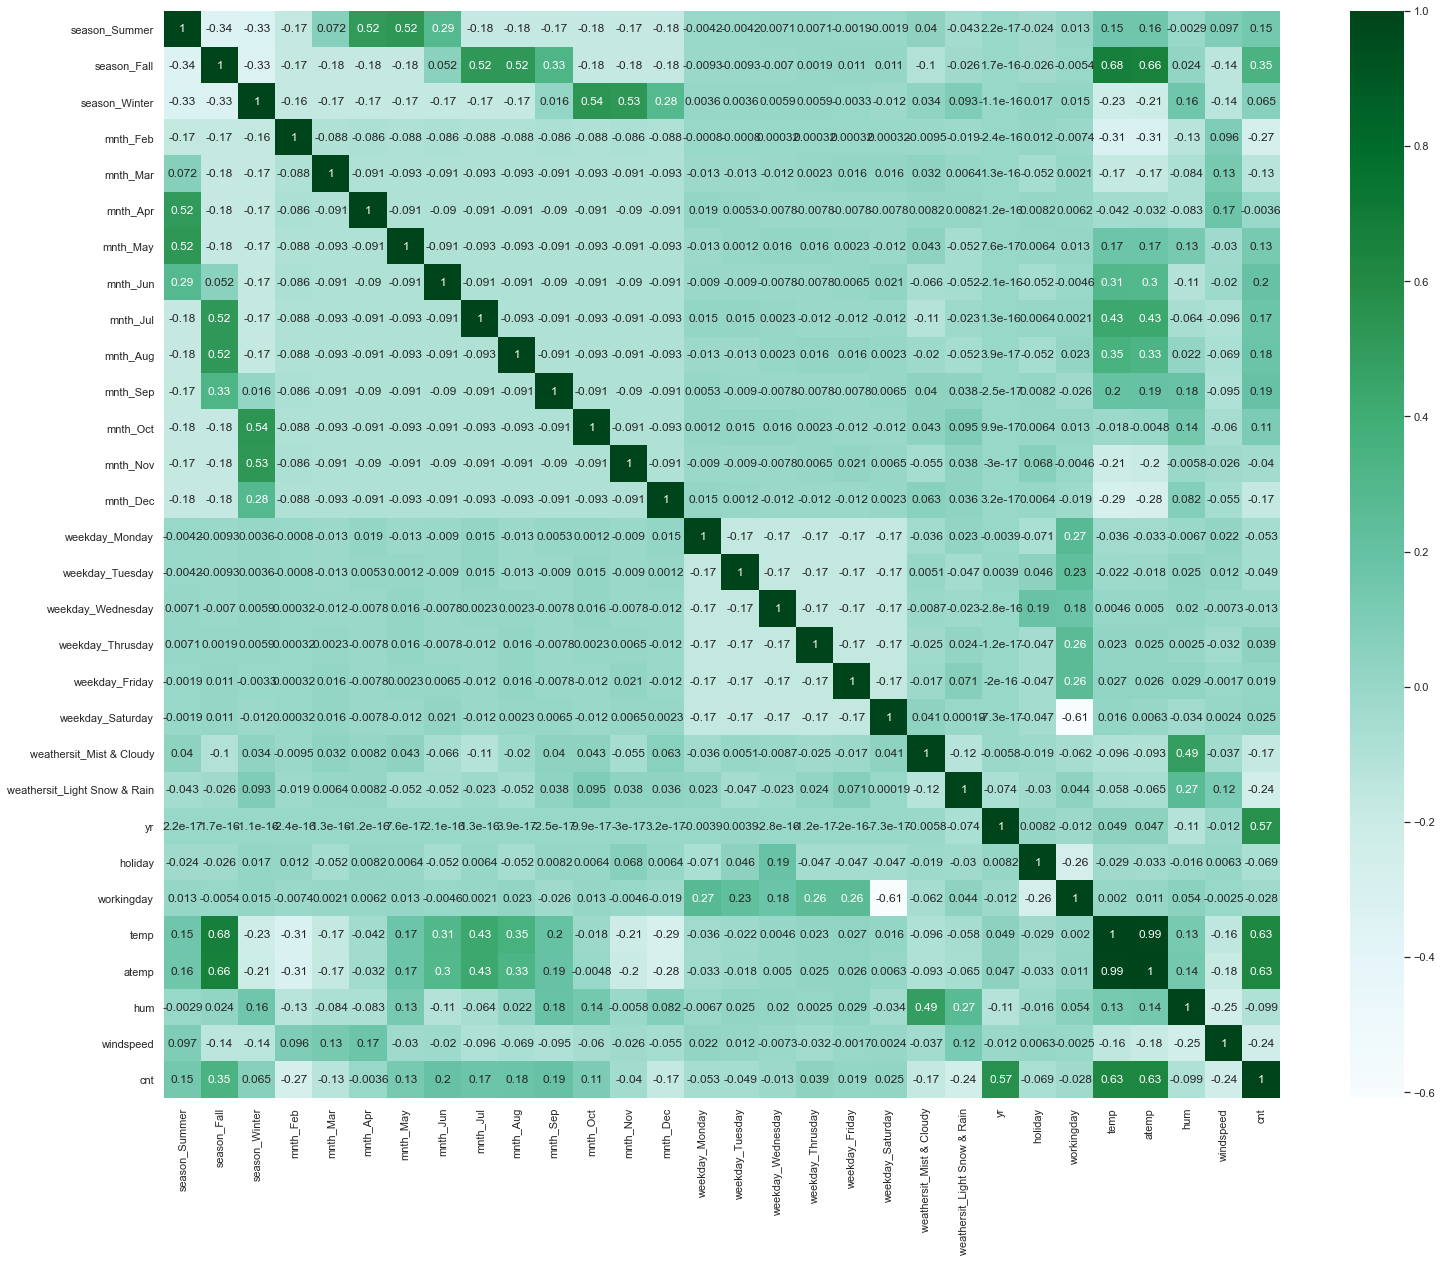

In [219]:
#plotting heatmap and checking corelation matrix
plt.figure(figsize=[25,20])
sns.heatmap(bike.corr(),annot=True,cmap="BuGn")
plt.show()

#### Observations:
* The heatmap clearly shows there are variables which  are multicollinear in nature, and which variable have high collinearity with the target variable.
* We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## 3: Splitting the Data into Training and Testing Sets

In [220]:
np.random.seed(100)
bike_train,bike_test=train_test_split(bike,train_size=0.7,random_state=100)

In [221]:
bike_train.shape

(510, 30)

In [222]:
bike_test.shape

(220, 30)

### Scaling the features

In [223]:
scaler=MinMaxScaler()

In [224]:
# Apply scaler() to all the numeric variables
columns= ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[columns]=scaler.fit_transform(bike_train[columns])

In [225]:
#sanity check
bike_train.describe()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.247059,0.262745,0.247059,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,...,0.345098,0.029412,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.431725,0.440557,0.431725,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,...,0.475867,0.169124,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


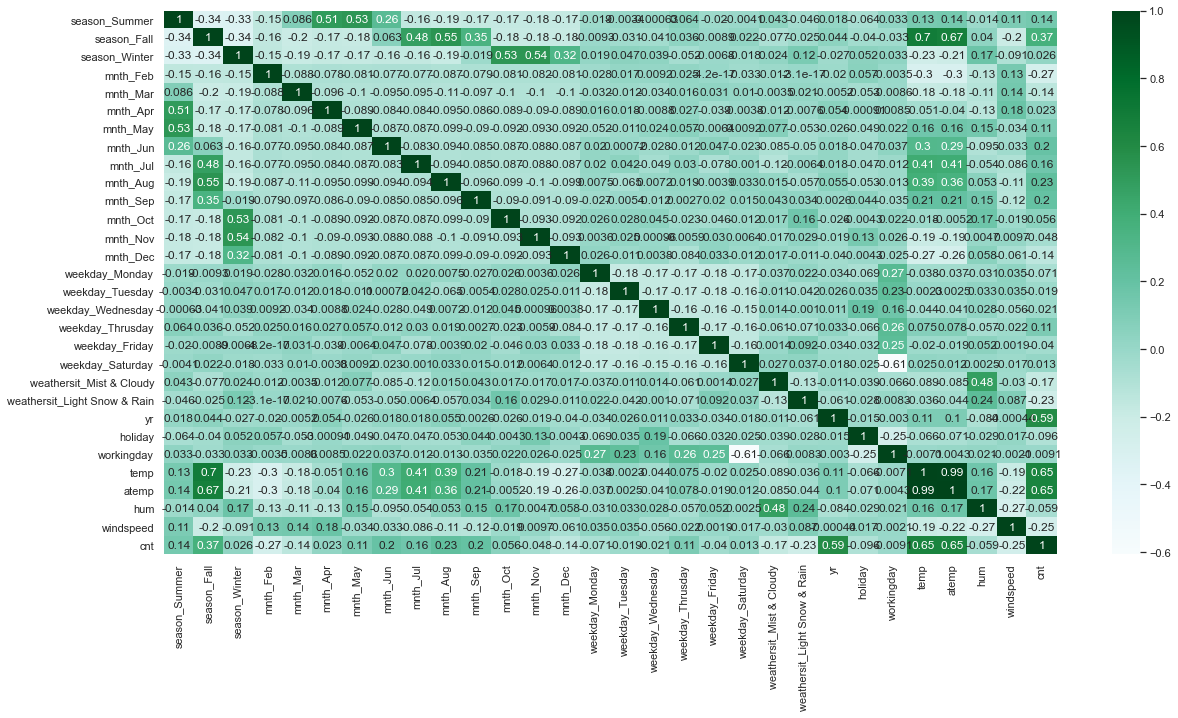

In [226]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="BuGn")
plt.show()

#### Observation:
* Target variable cnt has high corelation with temp variable

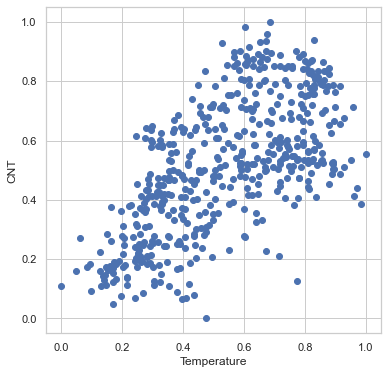

In [227]:
# Visualizing temp  correlation with cnt  to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.title("Temperature vs CNT")
plt.scatter(bike_train["temp"], bike_train["cnt"])
plt.xlabel("Temperature")
plt.ylabel("CNT")
plt.show()

Its concluded from scatter plot that there is positive correlation between temp and cnt

### Creating X_train and y_train sets for model Building

In [228]:
y_train=bike_train.pop("cnt")
X_train=bike_train

In [229]:
#sanity check
X_train.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475
111,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.318819,0.751824,0.380981


In [230]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## 4: Building Linear Model

In [231]:
# Running RFE with the output number of the variable equal to 15
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [232]:
#Running RFE to cut down number of features to 15 using automated approach
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [233]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Feb', False, 11),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', False, 3),
 ('mnth_May', True, 1),
 ('mnth_Jun', False, 2),
 ('mnth_Jul', False, 12),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 13),
 ('mnth_Dec', False, 14),
 ('weekday_Monday', False, 9),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 8),
 ('weekday_Thrusday', False, 6),
 ('weekday_Friday', False, 7),
 ('weekday_Saturday', False, 15),
 ('weathersit_Mist & Cloudy', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [234]:
columns=X_train.columns[rfe.support_]
columns

Index(['season_Summer', 'season_Fall', 'season_Winter', 'mnth_Mar', 'mnth_May',
       'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [235]:
X_train.columns[~rfe.support_]

Index(['mnth_Feb', 'mnth_Apr', 'mnth_Jun', 'mnth_Jul', 'mnth_Nov', 'mnth_Dec',
       'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thrusday', 'weekday_Friday', 'weekday_Saturday', 'workingday',
       'atemp'],
      dtype='object')

In [236]:
#creating new Dataframe with RFE selected features
X_train_rfe= X_train[columns]

In [237]:
#sanity check
X_train_rfe.head()

,season_Summer,season_Fall,season_Winter,mnth_Mar,mnth_May,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,temp,hum,windspeed
576,0,1,0,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,1,0,0,0,0,1,0,1,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1,0,0,0,0,0,0,0,1,0,1,0,0.395666,0.504508,0.188475
111,1,0,0,0,0,0,0,0,1,0,0,0,0.345824,0.751824,0.380981


### Building Linear Model using 'STATS MODEL'  for the detailed statistics

#### Model 1: Starting with all variables selected by RFE

In [238]:
# Adding a constant
X_train_rfe=sm.add_constant(X_train_rfe)

In [239]:
# Create a first fitted model
lr1=sm.OLS(y_train,X_train_rfe).fit()

In [240]:
# Checking the parameters 
lr1.params

const                           0.237384
season_Summer                   0.116592
season_Fall                     0.042479
season_Winter                   0.152975
mnth_Mar                        0.032292
mnth_May                        0.028201
mnth_Aug                        0.050905
mnth_Sep                        0.120667
mnth_Oct                        0.040741
weathersit_Mist & Cloudy       -0.054170
weathersit_Light Snow & Rain   -0.242870
yr                              0.230442
holiday                        -0.088900
temp                            0.486920
hum                            -0.179606
windspeed                      -0.183865
dtype: float64

In [241]:
# summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.00e-188
Time:                        13:16:15   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [242]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,47.52
2,season_Fall,6.49
13,temp,3.83
1,season_Summer,2.83
3,season_Winter,2.36
14,hum,1.93
6,mnth_Aug,1.68
5,mnth_May,1.56
9,weathersit_Mist & Cloudy,1.56
8,mnth_Oct,1.52


### Observations

* We generally want a VIF that is less than 5 and P value <0.05. From above observation season_fall has high VIF and high p value. Let's drop this variable. 

In [243]:
X_train_new = X_train_rfe.drop(["season_Fall"], axis = 1)

In [244]:
X_train_new.head()

,const,season_Summer,season_Winter,mnth_Mar,mnth_May,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,temp,hum,windspeed
576,1.0,0,0,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,0,0,1,0,0,0,0,1,0,1,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,1,0,0,0,0,0,0,1,0,1,0,0.395666,0.504508,0.188475
111,1.0,1,0,0,0,0,0,0,1,0,0,0,0.345824,0.751824,0.380981


#### Model 2 : Rebuilding model without 'season_Fall' Feature


In [245]:
# Adding a constant
X_train_rfe=sm.add_constant(X_train_new)

# Create 2nd model
lr2=sm.OLS(y_train,X_train_rfe).fit()

In [246]:
#summary of second model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          3.87e-189
Time:                        13:16:15   Log-Likelihood:                 512.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     495   BIC:                            -930.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [247]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.51
13,hum,1.91
2,season_Winter,1.78
1,season_Summer,1.74
12,temp,1.63
8,weathersit_Mist & Cloudy,1.55
4,mnth_May,1.51
7,mnth_Oct,1.49
5,mnth_Aug,1.47
6,mnth_Sep,1.25


### Observation
* So from above observation 'mnth_May' has high P . We will drop this feature

In [248]:
#Dropping mnth_May feature as it is insignificant in front of other features
X_train_new = X_train_rfe.drop(["mnth_May"], axis = 1)

In [249]:
X_train_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Mar', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'weathersit_Mist & Cloudy',
       'weathersit_Light Snow & Rain', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

#### Model 3 : Rebuilding model without 'mnth_May' variable

In [250]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a 3rd fitted model
lr3 = sm.OLS(y_train, X_train_new).fit()

In [251]:
#Let's see the summary of our linear model3
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          5.94e-190
Time:                        13:16:15   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [252]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
12,hum,1.86
2,season_Winter,1.78
11,temp,1.62
7,weathersit_Mist & Cloudy,1.55
6,mnth_Oct,1.48
4,mnth_Aug,1.46
1,season_Summer,1.38
5,mnth_Sep,1.25
8,weathersit_Light Snow & Rain,1.24


### Observation
* So from above observation 'mnth_Mar' has high P value . We will drop this feature

In [253]:
#Dropping holiday variable as it is insignificant in front of other features
X_train_new = X_train_rfe.drop(["mnth_Mar"], axis = 1)

In [254]:
X_train_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weathersit_Mist & Cloudy', 'weathersit_Light Snow & Rain',
       'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

#### Model 4 : Rebuilding model without 'mnth_Mar' feature

In [255]:
# Add a constant
X_train_rfe = sm.add_constant(X_train_new)

# Create a 4th fitted model
lr4 = sm.OLS(y_train, X_train_new).fit()

In [256]:
#Let's see the summary of our linear model4
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          1.49e-190
Time:                        13:16:15   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [257]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.88
11,hum,1.86
2,season_Winter,1.71
10,temp,1.59
6,weathersit_Mist & Cloudy,1.55
5,mnth_Oct,1.48
3,mnth_Aug,1.45
1,season_Summer,1.38
4,mnth_Sep,1.24
7,weathersit_Light Snow & Rain,1.24


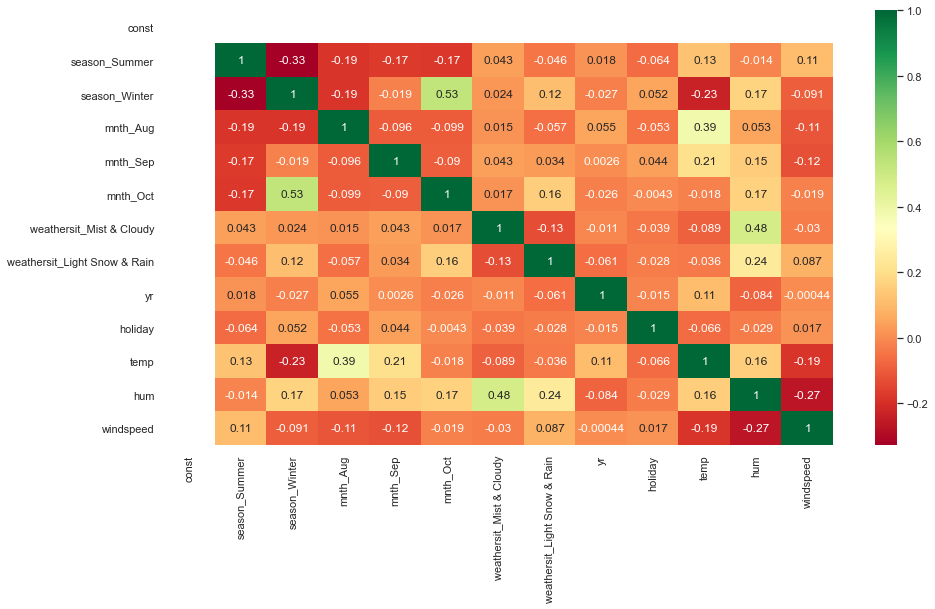

In [258]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

### Observations

* The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only
* R2 is 0.842 
* So we go ahead and make our predictions using this model only as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
* Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [259]:
#predict y variable
y_train_pred=lr4.predict(X_train_rfe)

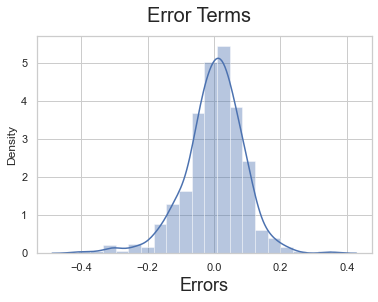

In [260]:
# Plot the histogram of the error terms

sns.distplot((y_train - y_train_pred),bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 
plt.show()


### Observtion
* From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Homoscedasticity

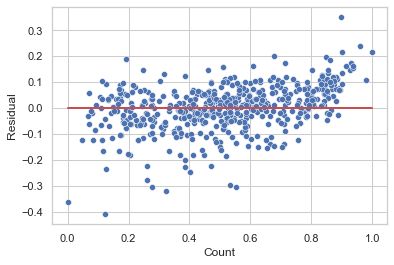

In [261]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


##### No visible pattern observed from above plot for residuals.

In [262]:
lr4.params

const                           0.239027
season_Summer                   0.105803
season_Winter                   0.135308
mnth_Aug                        0.058540
mnth_Sep                        0.127705
mnth_Oct                        0.035821
weathersit_Mist & Cloudy       -0.053105
weathersit_Light Snow & Rain   -0.238470
yr                              0.228857
holiday                        -0.094111
temp                            0.531625
hum                            -0.181797
windspeed                      -0.186835
dtype: float64

## 5: Final Model Interpretation

#### Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

const                           0.239027
season_Summer                   0.105803
season_Winter                   0.135308
mnth_Aug                        0.058540
mnth_Sep                        0.127705
mnth_Oct                        0.035821
weathersit_Mist & Cloudy       -0.053105
weathersit_Light Snow & Rain   -0.238470
yr                              0.228857
holiday                        -0.094111
temp                            0.531625
hum                            -0.181797
windspeed                      -0.186835


From the lr4 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

##### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic:                     221.3
Prob (F-statistic):          1.49e-190

The F-Statistics value of 221.3 (which is greater than 1) and the p-value is almost 0 
states that the overall model is significant

#### The equation of best fitted surface based on model lr4:
cnt = 0.2390 + (season_Summer x 0.1058 ) + (season_Winter x 0.1353 ) + (mnth_Aug x 0.0585 ) + (mnth_Sep x 0.1277 ) + (mnth_Oct  x 0.0358) - (weathersit_Mist & Cloudy x 0.0531  ) - (weathersit_Light Snow & Rain x 0.2384 ) + (yr x 0.2288 ) - (holiday x 0.0941) + (temp x 0.5316) - (hum x 0.1817) - (windspeed x 0.1868)  

#### The Constant value of  0.2390   indicates that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by  0.2390 units

## 6: Making Predictions Using the Final Model

In [263]:
# Apply scaler() to all numeric variables in test dataset

num_col=['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_col]=scaler.transform(bike_test[num_col])

In [264]:
#sanity check
bike_test.describe()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.263636,0.245455,0.236364,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,...,0.318182,0.027273,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.441609,0.431338,0.425817,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,...,0.466833,0.163248,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### Creating X_test and y_test

In [265]:
y_test=bike_test.pop("cnt")

X_test=bike_test

In [266]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [267]:
X_test.head()

,season_Summer,season_Fall,season_Winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_Jun,mnth_Jul,mnth_Aug,...,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain,yr,holiday,workingday,temp,atemp,hum,windspeed
184,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0.831783,0.769660,0.657364,0.084219
535,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0.511964,0.496145,0.837699,0.334206
221,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0.817246,0.741471,0.314298,0.537414


In [268]:
X_train_rfe=X_train_rfe.drop(["const"],axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new=X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new=sm.add_constant(X_test_new)

In [269]:
#Sanity check
X_test_new.columns

Index(['const', 'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weathersit_Mist & Cloudy', 'weathersit_Light Snow & Rain',
       'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [270]:
#Sanity Check
X_train_rfe.columns

Index(['season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct',
       'weathersit_Mist & Cloudy', 'weathersit_Light Snow & Rain', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [271]:
#Making prediction
y_pred=lr4.predict(X_test_new)

## 7: Model Evaluation

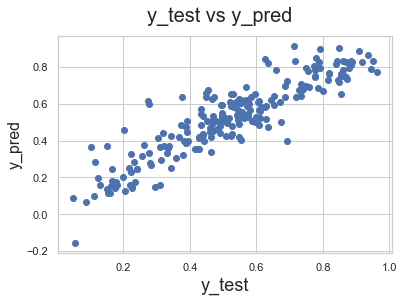

In [272]:
plt.scatter(y_test,y_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Observation
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

## Calculating R^2 Score for TEST

In [273]:
from sklearn.metrics import r2_score

In [274]:
r2_score(y_test,y_pred)

0.8116537323246351

## Calculating Mean Squared Error

In [275]:
from sklearn.metrics import mean_squared_error

In [276]:
mse = mean_squared_error(y_test, y_pred)
mse

0.009005641086817643

### Calculating Adjusted R2 Score for TEST


In [277]:
#Cal
r2 = 0.8116537323246351

# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7997678028111412

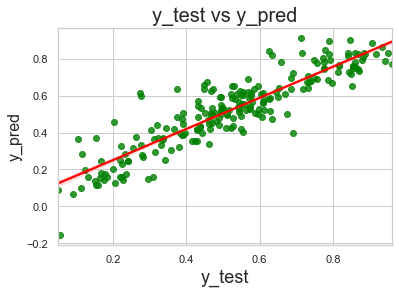

In [278]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset:


- Train dataset R^2          : 0.842
- Test dataset R^2           : 0.811
- Train dataset Adjusted R^2 : 0.839  
- Test dataset Adjusted R^2  : 0.799

In [279]:
#Checking the coefficients from the final model
param = pd.DataFrame(lr4.params)
param

,0
const,0.239027
season_Summer,0.105803
season_Winter,0.135308
mnth_Aug,0.058540
mnth_Sep,0.127705
mnth_Oct,0.035821
weathersit_Mist & Cloudy,-0.053105
weathersit_Light Snow & Rain,-0.238470
yr,0.228857
holiday,-0.094111


#### The equation of best fitted surface based on model lr4:
cnt = 0.2390 + (season_Summer x 0.1058 ) + (season_Winter x 0.1353 ) + (mnth_Aug x 0.0585 ) + (mnth_Sep x 0.1277 ) + (mnth_Oct  x 0.0358) - (weathersit_Mist & Cloudy x 0.0531  ) - (weathersit_Light Snow & Rain x 0.2384 ) + (yr x 0.2288 ) - (holiday x 0.0941) + (temp x 0.5316) - (hum x 0.1817) - (windspeed x 0.1868)  

## 8: FINAL INTERPRETATIONS

### Analysing the model the company should take the following steps into consideration 

* Temperature (temp) is having the highest co-efficent . It plays a major role in bookings. A a unit increase in temp  variable increases the bike hire numbers by 0.5393 units when the temperature in normal range
* Company should focus on expanding business during August and September months 
* When there is high windspeed and misty-cloudy and rainy weathers bike rentals might go low.
* Holiday season is also one such fator wherein rentals might be low.

### Variables significant in predicting the demand for shared bikes are :
* Seasons:   Summer and Winter 	
* Months : August and September	
* Year : 2019
* temp	

##### All the  above variables ( season_Summer, season_Winter, mnth_Aug, mnth_Sep yr,temp)	have positive coefficients  indicate that an increase in these values will lead to an increase in the bike rentals


### Variables which are responsible for decrease in the number of bookings are :
* Weather : Mist & Cloudy , Light Snow & Rain
* hum: humidity
* windspeed: wind speed
* holiday

##### All the  above variables ( weathersit_Mist & Cloudy , weathersit_Light Snow & Rain, hum, windspeed, holiday)	have negative  coefficients  indicate that an increase  in these values will lead to a decrease in the bike rentals